Diabetes mellitus, also commonly known as diabetes is a disorder that is characterized by high blood sugar. In this python notebook, we intend to use various Machine Learning models in order to predict the diabetes based on multiple diagnostic and lifestyle features. 

The link to the dataset can be found in this Google Drive link: https://drive.google.com/drive/folders/11d_BptJ2JlIqTE2Ef6tKYVlchFynkpe4?usp=sharing 

Creating a shortcut to this shared folder on your Google Drive will make it easier to execute this python notebook.

Importing required packages

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Connecting Google Drive to Google Colab
from typing_extensions import dataclass_transform
from google.colab import drive

# Importing numpy, matplotlib, pandas and math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Importing sklearn, seaborn packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from scipy.special import softmax
import seaborn as sns

# Importing packages required for sampling
from imblearn.over_sampling import SMOTE

In [ ]:
# Mount Google Drive to Google Colab
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/MLProject/diabetes_012_health_indicators_BRFSS2015.csv"

Mounted at /content/drive


In [ ]:
# Loading the dataset
data = np.loadtxt(file_path,
                 delimiter=",", dtype=str)

# Understanding the properties of the dataset

print("Data shape: ", data.shape)
print()

# Separating header
header = data[0]
print ("Header: \n", header)
print()

# Data without header
data_without_header = data[1:]

data_float64 = data_without_header.astype(float)
print("Data head: \n", data_float64[:10])
print()

print("Datatype of data: ", data_float64.shape)

Data shape:  (253681, 22)

Header: 
 ['Diabetes_012' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']

Data head: 
 [[ 0.  1.  1.  1. 40.  1.  0.  0.  0.  0.  1.  0.  1.  0.  5. 18. 15.  1.
   0.  9.  4.  3.]
 [ 0.  0.  0.  0. 25.  1.  0.  0.  1.  0.  0.  0.  0.  1.  3.  0.  0.  0.
   0.  7.  6.  1.]
 [ 0.  1.  1.  1. 28.  0.  0.  0.  0.  1.  0.  0.  1.  1.  5. 30. 30.  1.
   0.  9.  4.  8.]
 [ 0.  1.  0.  1. 27.  0.  0.  0.  1.  1.  1.  0.  1.  0.  2.  0.  0.  0.
   0. 11.  3.  6.]
 [ 0.  1.  1.  1. 24.  0.  0.  0.  1.  1.  1.  0.  1.  0.  2.  3.  0.  0.
   0. 11.  5.  4.]
 [ 0.  1.  1.  1. 25.  1.  0.  0.  1.  1.  1.  0.  1.  0.  2.  0.  2.  0.
   1. 10.  6.  8.]
 [ 0.  1.  0.  1. 30.  1.  0.  0.  0.  0.  0.  0.  1.  0.  3.  0. 14.  0.
   0.  9.  6.  7.]
 [ 0.  1.  1.  1. 25.  1.  0.  0.  1.  

**Original Dataset (253680, 22)**



In [ ]:
# Splitting data into train and test - train - 75%, test - 25%

y = data_float64[:, 0]
print("Labels: \n", y)
print()

X = data_float64[:,1:]
print("Data: \n", X)
print()

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size= 0.25 , random_state=42)
print("X_train, y_train, X_test, y_test shapes: \n", X_train.shape, y_train.shape, X_test.shape, y_test.shape)


Labels: 
 [0. 0. 0. ... 0. 0. 2.]

Data: 
 [[1. 1. 1. ... 9. 4. 3.]
 [0. 0. 0. ... 7. 6. 1.]
 [1. 1. 1. ... 9. 4. 8.]
 ...
 [0. 0. 1. ... 2. 5. 2.]
 [1. 0. 1. ... 7. 5. 1.]
 [1. 1. 1. ... 9. 6. 2.]]

X_train, y_train, X_test, y_test shapes: 
 (190260, 21) (190260,) (63420, 21) (63420,)


Unique elements and the count in y_train: 
 [0. 1. 2.] [160225   3452  26583]



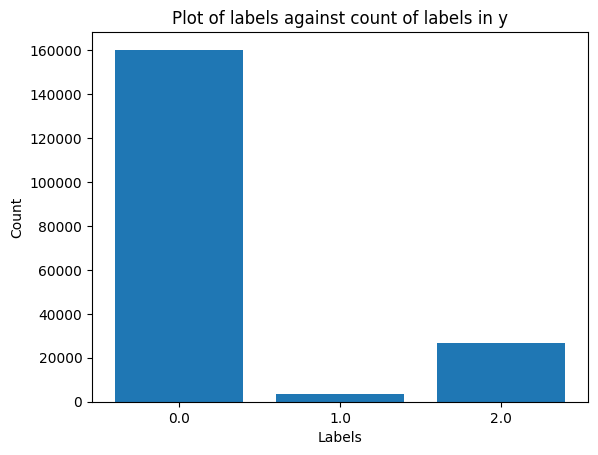

In [ ]:
# Count the number of samples in each class of labels in the original dataset

unique_elements_ytrain, counts_elements_ytrain = np.unique(y_train, return_counts=True)

print("Unique elements and the count in y_train: \n", unique_elements_ytrain, counts_elements_ytrain)
print()

plt.bar(unique_elements_ytrain, counts_elements_ytrain)
plt.title("Plot of labels against count of labels in y")
plt.xlabel("Labels")
plt.ylabel("Count")

plt.xticks(unique_elements_ytrain, unique_elements_ytrain)

plt.show()

Unique elements and the count in y_train after SMOTE: 
 [0. 1. 2.] [160225 160225 160225]



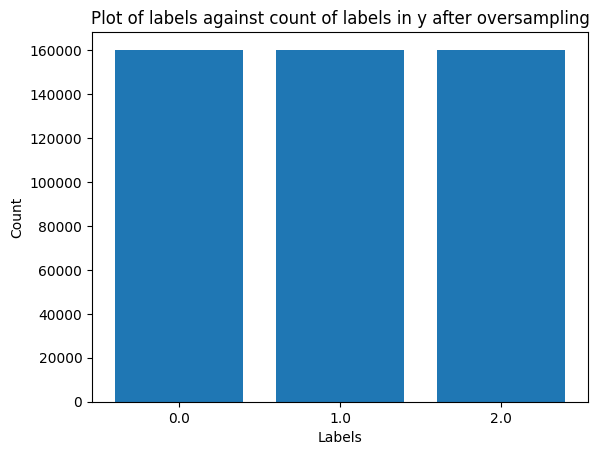

In [ ]:
# Performing oversampling using SMOTE on the original dataset

smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled= smote.fit_resample(X_train, y_train)

unique_elements_ytrain_oversampled, counts_elements_ytrain_oversampled = np.unique(y_train_oversampled, return_counts=True)

print("Unique elements and the count in y_train after SMOTE: \n", unique_elements_ytrain_oversampled, counts_elements_ytrain_oversampled)
print()

plt.bar(unique_elements_ytrain_oversampled, counts_elements_ytrain_oversampled)
plt.title("Plot of labels against count of labels in y after oversampling")
plt.xlabel("Labels")
plt.ylabel("Count")

plt.xticks(unique_elements_ytrain_oversampled, unique_elements_ytrain_oversampled)

plt.show()

**Considering only 14,000 samples from the original dataset for ease of computation**

In [ ]:
# Considering only 14,000 samples

X_14k = X[0:14000,]
y_14k = y[0:14000,]

print("Shape of the first 14,000 samples X: ", X_14k.shape)
print("Shape of the first 14,000 samples y: ", y_14k.shape)

X_train_14k , X_test_14k , y_train_14k , y_test_14k = train_test_split(X_14k,y_14k , test_size= 0.25 , random_state=42)
print("X_train_14k, y_train_14k, X_test_14k, y_test_14k shapes: \n", X_train_14k.shape, y_train_14k.shape, X_test_14k.shape, y_test_14k.shape)

Shape of the first 14,000 samples X:  (14000, 21)
Shape of the first 14,000 samples y:  (14000,)
X_train_14k, y_train_14k, X_test_14k, y_test_14k shapes: 
 (10500, 21) (10500,) (3500, 21) (3500,)


Unique elements and the count in y_train_14k: 
 [0. 1. 2.] [8610  185 1705]



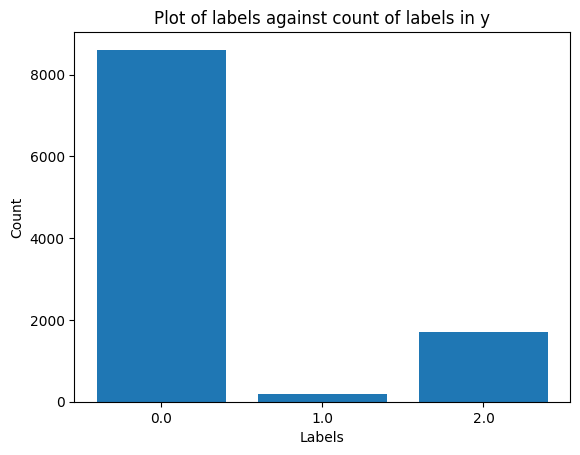

In [ ]:
# Count the number of samples in each class of labels in the 14,000 samples dataset

unique_elements_y_train_14k, counts_elements_y_train_14k = np.unique(y_train_14k, return_counts=True)

print("Unique elements and the count in y_train_14k: \n", unique_elements_y_train_14k, counts_elements_y_train_14k)
print()

plt.bar(unique_elements_y_train_14k, counts_elements_y_train_14k)
plt.title("Plot of labels against count of labels in y")
plt.xlabel("Labels")
plt.ylabel("Count")

plt.xticks(unique_elements_y_train_14k, unique_elements_y_train_14k)

plt.show()

Unique elements and the count in y_train_train after SMOTE: 
 [0. 1. 2.] [8610 8610 8610]

(25830, 21)


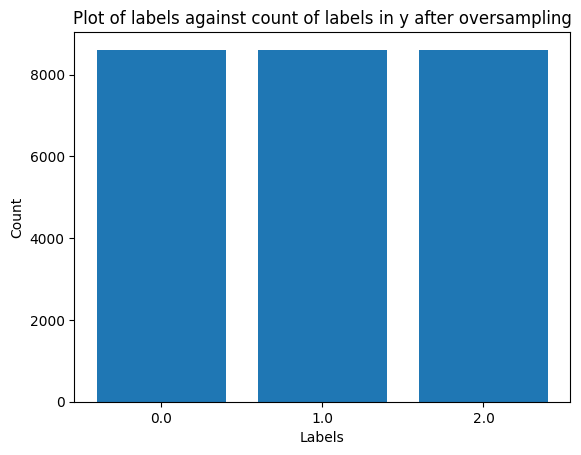

In [ ]:
# Performing oversampling on the training dataset using SMOTE on the 14000 samples dataset

smote = SMOTE(random_state=42)
X_train_oversampled_14k, y_train_oversampled_14k = smote.fit_resample(X_train_14k, y_train_14k)

unique_elements_y_train_oversampled_14k, counts_elements_y_train_oversampled_14k = np.unique(y_train_oversampled_14k, return_counts=True)

print("Unique elements and the count in y_train_train after SMOTE: \n", unique_elements_y_train_oversampled_14k, counts_elements_y_train_oversampled_14k)
print()

plt.bar(unique_elements_y_train_oversampled_14k, counts_elements_y_train_oversampled_14k)
plt.title("Plot of labels against count of labels in y after oversampling")
plt.xlabel("Labels")
plt.ylabel("Count")

plt.xticks(unique_elements_y_train_oversampled_14k, unique_elements_y_train_oversampled_14k)
print(X_train_oversampled_14k.shape)
plt.show()

**Fitting machine learning models and evaluation**

**Random Forest for 14,000 samples dataset - without and with SMOTE**

In [ ]:
# Random Forest

# Initializing the model
rf_model = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',
                             min_samples_split=10, random_state=0)

# Fitting the model on the train data without SMOTE
rf_model.fit(X_train_14k, y_train_14k)

# Predicting values on test data without SMOTE
y_pred_14k = rf_model.predict(X_test_14k)

# Fitting the model on the train data with SMOTE
rf_model.fit(X_train_oversampled_14k, y_train_oversampled_14k)

# Predicting values on test data with SMOTE
y_pred_oversampled_14k = rf_model.predict(X_test_14k)

**Evaluation of Random Forest for data without SMOTE**

Accuracy original: 82.68571428571428 %
Classification Report original:
               precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      2868
         1.0       0.00      0.00      0.00        56
         2.0       0.56      0.16      0.25       576

    accuracy                           0.83      3500
   macro avg       0.47      0.38      0.38      3500
weighted avg       0.78      0.83      0.78      3500

Confusion Matrix original :
 [[2802    0   66]
 [  50    0    6]
 [ 484    0   92]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


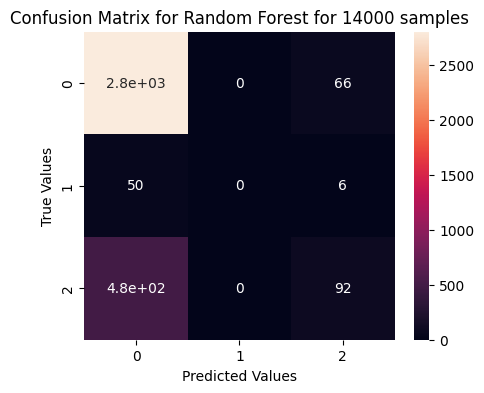

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_14k)
print("Accuracy original:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_14k)
print("Classification Report original:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for Random Forest for 14000 samples')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

**Evaluation of Random Forest for data with SMOTE**

Accuracy oversampled: 82.17142857142858 %
Classification Report oversampled:
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      2868
         1.0       0.00      0.00      0.00        56
         2.0       0.50      0.23      0.31       576

    accuracy                           0.82      3500
   macro avg       0.45      0.39      0.40      3500
weighted avg       0.78      0.82      0.79      3500

Confusion Matrix oversampled :
 [[2745    0  123]
 [  49    0    7]
 [ 445    0  131]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


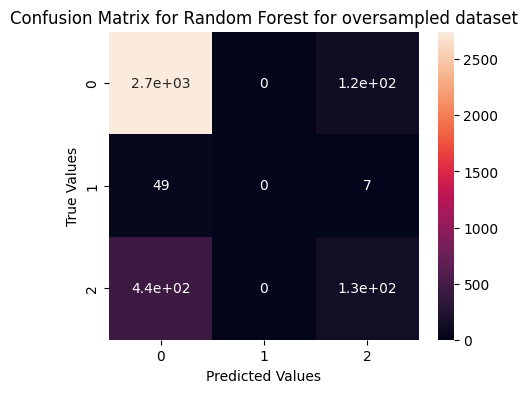

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_oversampled_14k)
print("Accuracy oversampled:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_oversampled_14k)
print("Classification Report oversampled:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_oversampled_14k)
print("Confusion Matrix oversampled :\n", cm)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for Random Forest for oversampled dataset')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

**Multiclass Logistic Regression for 14,000 samples dataset - without and with SMOTE**

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


class MulticlassLogisticRegression:
    def __init__(self, max_iter=1000, eta=1e-3, rho=1e-6):
        self.max_iter = max_iter
        self.eta = eta
        self.rho = rho
        self.onehot = OneHotEncoder(sparse=False)

    def fit(self, X, Y):
        y_onehot = self.onehot.fit_transform(Y.reshape(-1, 1))
        W = np.zeros((X.shape[1], y_onehot.shape[1]))
        steps, losses, W_list = self.gradient_descent(X, y_onehot, W)
        self.loss_steps = pd.DataFrame({
            'step': steps, 
            'loss': losses
        })
        self.W = W_list[-1]

    def predict(self, H):
        X = - H @ self.W
        P = self.softmax(X, axis=1)
        pred = np.argmax(P, axis=1)
        return pred

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def gradient_descent(self, X, Y, W):
        steps = []
        losses = []
        W_list = []
        for i in range(self.max_iter):
            steps.append(i + 1)
            X_W = - X @ W
            term1 = 1 / X.shape[0] * (np.trace(X @ W @ Y.T))
            term2_sub = np.sum(np.exp(X_W), axis=1)
            term2 = np.sum(np.log(term2_sub))
            loss = term1 + term2
            losses.append(loss)
            W_list.append(W.copy())
            gradient = self.calc_gradient(X, Y, W)
            W -= self.eta * gradient

        return steps, losses, W_list

    def calc_gradient(self, X, Y, W):
        X_W = - X @ W
        prob = self.softmax(X_W, axis=1)
        gradient = (1 / X.shape[0]) * (X.T @ (Y - prob)) + 2 * self.rho * W
        return gradient

    def softmax(x, axis=None):
        # avoid overflow
        x -= np.max(x, axis=axis, keepdims=True)
        ex = np.exp(x)
        return ex / np.sum(ex, axis=axis, keepdims=True)

In [ ]:
# Initializing the model
lrModel = MulticlassLogisticRegression()

# Fitting the model on the train data without SMOTE
lrModel.fit(X_train_14k, y_train_14k)

# Predicting values on test data without SMOTE
y_pred_14k = lrModel.predict(X_test_14k)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<Axes: xlabel='step', ylabel='loss'>

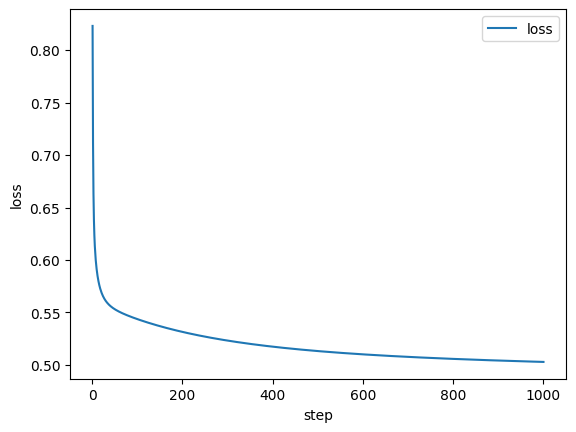

In [ ]:
# Plotting loss vs step

lrModel.loss_plot()

In [ ]:
# Initializing the model
lrModel = MulticlassLogisticRegression()

# Fitting the model on the train data with SMOTE
lrModel.fit(X_train_oversampled_14k, y_train_oversampled_14k)

# Predicting values on test data with SMOTE
y_pred_oversampled_14k = lrModel.predict(X_test_14k)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<Axes: xlabel='step', ylabel='loss'>

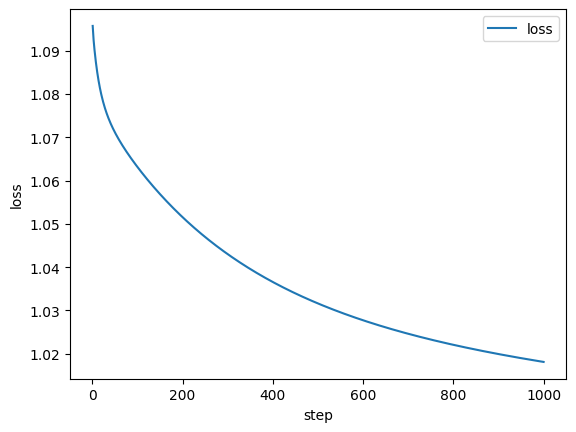

In [ ]:
# Plotting loss vs step

lrModel.loss_plot()

**Evaluation of Multiclass Logistic Regression for data without SMOTE**

Accuracy original: 81.71428571428572 %
Classification Report original:
               precision    recall  f1-score   support

         0.0       0.82      0.99      0.90      2868
         1.0       0.00      0.00      0.00        56
         2.0       0.41      0.04      0.07       576

    accuracy                           0.82      3500
   macro avg       0.41      0.34      0.32      3500
weighted avg       0.74      0.82      0.75      3500

Confusion Matrix original :
 [[2839    0   29]
 [  55    0    1]
 [ 555    0   21]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


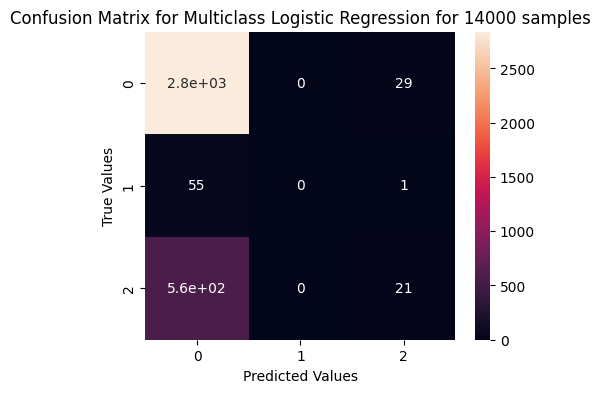

In [ ]:
# Evaluation

# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_14k)
print("Accuracy original:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_14k)
print("Classification Report original:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for Multiclass Logistic Regression for 14000 samples')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

**Evaluation of Multiclass Logistic Regression for data with SMOTE**

Balanced accuracy : 43.1676642646831 %
Accuracy oversampled: 61.4 %
Classification Report oversampled:
               precision    recall  f1-score   support

         0.0       0.90      0.64      0.75      2868
         1.0       0.02      0.12      0.03        56
         2.0       0.29      0.53      0.37       576

    accuracy                           0.61      3500
   macro avg       0.40      0.43      0.38      3500
weighted avg       0.79      0.61      0.68      3500

Confusion Matrix oversampled :
 [[1837  297  734]
 [  27    7   22]
 [ 173   98  305]]


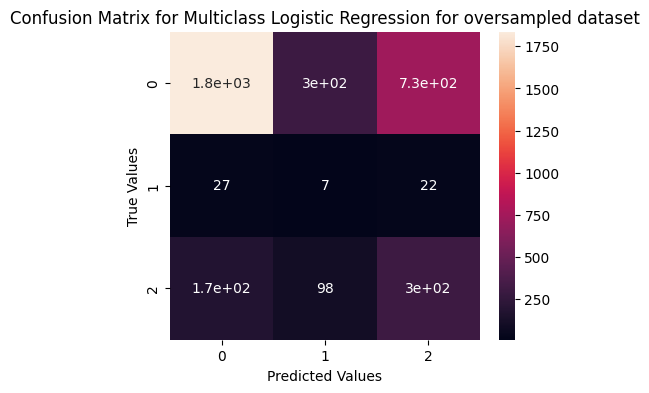

In [ ]:
# bal_acc=balanced_accuracy_score(y_test_14k, y_pred_oversampled_14k)
# print("Balanced accuracy :", bal_acc*100, "%")

# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_oversampled_14k)
print("Accuracy oversampled:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_oversampled_14k)
print("Classification Report oversampled:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_oversampled_14k)
print("Confusion Matrix oversampled :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for Multiclass Logistic Regression for oversampled dataset')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

**k-Nearest Neighbor for 14,000 samples dataset over a ranges of k (3,...,17) - without and with SMOTE**

In [ ]:
# K Nearest Neighbor Model


class KNearestNeighborModel:
    
    def __init__(self, kValue):
        self.kValue = kValue
    
    def fitTheTrain(self, Xtrain, ytrain):
        self.trainX = Xtrain
        self.trainY = ytrain
        
    def predictTheTest(self, Xtest):
        
        finalPredictionList = []
        
        for points in Xtest:
            
            
            allDistances = []
            
            
            for i, j in enumerate(self.trainX):
                
                
                distanceValue = np.sqrt(np.sum(np.square(points - j)))
                allDistances.append((distanceValue, self.trainY[i]))
                
            # sort according to distances
            sortedAllDistances = sorted(allDistances)
            
            # get the k points only
            kPoints = sortedAllDistances[:self.kValue]
            
            kLabels = [labelValue for (_, labelValue) in kPoints]
            predValues = max(set(kLabels), key=kLabels.count)
            
            finalPredictionList.append(predValues)
            returnArrayPredictions = np.array(finalPredictionList)
            
      
        return returnArrayPredictions

In [ ]:
# predictions and accuracy score from KNN Model

# set model
knnModel = KNearestNeighborModel(3)

# fit training data
knnModel.fitTheTrain(X_train_14k, y_train_14k)

# predict for X test
y_pred_14k = knnModel.predictTheTest(X_test_14k)

# fit training data
knnModel.fitTheTrain(X_train_oversampled_14k, y_train_oversampled_14k)

# predict for X test
y_pred_oversampled_14k = knnModel.predictTheTest(X_test_14k)

# calculate accuracy score
acc= accuracy_score(y_test_14k, y_pred_oversampled_14k)

print("Accuracy Score:", acc)

Accuracy Score: 0.6182857142857143


**Evaluation of kNN for data without SMOTE**

Accuracy original: 80.0 %
Classification Report original:
               precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      2868
         1.0       0.00      0.00      0.00        56
         2.0       0.34      0.14      0.20       576

    accuracy                           0.80      3500
   macro avg       0.39      0.36      0.36      3500
weighted avg       0.74      0.80      0.76      3500

Confusion Matrix original :
 [[2717    3  148]
 [  46    0   10]
 [ 491    2   83]]


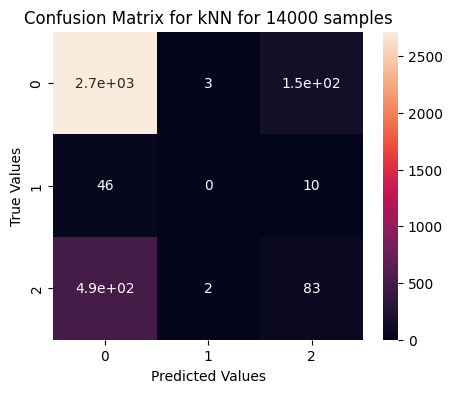

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_14k)
print("Accuracy original:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_14k)
print("Classification Report original:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for 14000 samples')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

**Evaluation of kNN for data with SMOTE**

Accuracy oversampled: 61.828571428571436 %
Classification Report oversampled:
               precision    recall  f1-score   support

         0.0       0.89      0.65      0.75      2868
         1.0       0.03      0.20      0.05        56
         2.0       0.27      0.48      0.35       576

    accuracy                           0.62      3500
   macro avg       0.40      0.44      0.38      3500
weighted avg       0.77      0.62      0.68      3500

Confusion Matrix oversampled :
 [[1877  271  720]
 [  30   11   15]
 [ 203   97  276]]


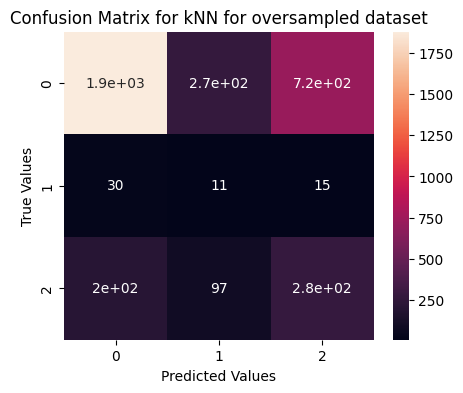

Confusion Matrix original :
 [[2717    3  148]
 [  46    0   10]
 [ 491    2   83]]


In [ ]:
# Create confusion matrix# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_oversampled_14k)
print("Accuracy oversampled:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_oversampled_14k)
print("Classification Report oversampled:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_oversampled_14k)
print("Confusion Matrix oversampled :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for oversampled dataset')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

In [ ]:
# predictions and accuracy score from KNN Model

# set model
knnModel = KNearestNeighborModel(5)

# fit training data
knnModel.fitTheTrain(X_train_14k, y_train_14k)

# predict for X test
y_pred_14k = knnModel.predictTheTest(X_test_14k)

# fit training data
knnModel.fitTheTrain(X_train_oversampled_14k, y_train_oversampled_14k)

# predict for X test
y_pred_oversampled_14k = knnModel.predictTheTest(X_test_14k)

# calculate accuracy score
acc= accuracy_score(y_test_14k, y_pred_oversampled_14k)

print("Accuracy Score:", acc)

Accuracy Score: 0.5908571428571429


Accuracy original: 80.80000000000001 %
Classification Report original:
               precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      2868
         1.0       0.00      0.00      0.00        56
         2.0       0.38      0.13      0.20       576

    accuracy                           0.81      3500
   macro avg       0.41      0.36      0.36      3500
weighted avg       0.75      0.81      0.76      3500

Confusion Matrix original :
 [[2751    0  117]
 [  48    0    8]
 [ 497    2   77]]


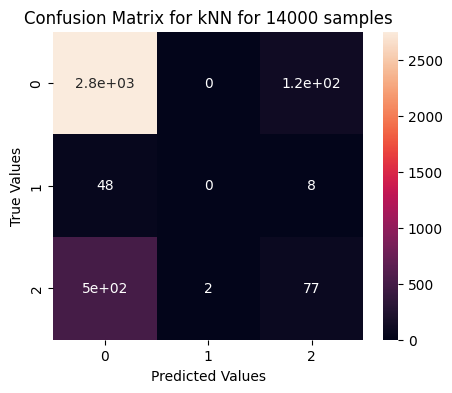

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_14k)
print("Accuracy original:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_14k)
print("Classification Report original:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for 14000 samples')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Accuracy oversampled: 59.08571428571429 %
Classification Report oversampled:
               precision    recall  f1-score   support

         0.0       0.90      0.61      0.73      2868
         1.0       0.02      0.20      0.04        56
         2.0       0.27      0.51      0.36       576

    accuracy                           0.59      3500
   macro avg       0.40      0.44      0.38      3500
weighted avg       0.78      0.59      0.66      3500

Confusion Matrix oversampled :
 [[1763  340  765]
 [  26   11   19]
 [ 175  107  294]]


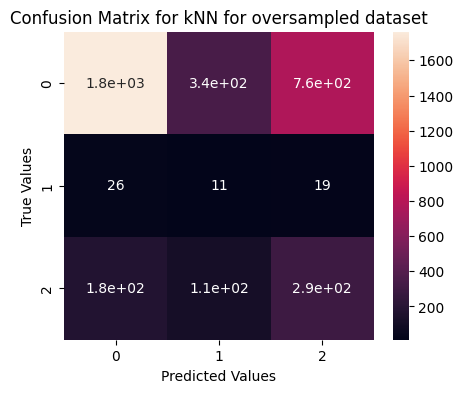

Confusion Matrix original :
 [[2751    0  117]
 [  48    0    8]
 [ 497    2   77]]


In [ ]:
# Create confusion matrix# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_oversampled_14k)
print("Accuracy oversampled:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_oversampled_14k)
print("Classification Report oversampled:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_oversampled_14k)
print("Confusion Matrix oversampled :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for oversampled dataset')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

In [ ]:
# predictions and accuracy score from KNN Model

# set model
knnModel = KNearestNeighborModel(7)

# fit training data
knnModel.fitTheTrain(X_train_14k, y_train_14k)

# predict for X test
y_pred_14k = knnModel.predictTheTest(X_test_14k)

# fit training data
knnModel.fitTheTrain(X_train_oversampled_14k, y_train_oversampled_14k)

# predict for X test
y_pred_oversampled_14k = knnModel.predictTheTest(X_test_14k)

# calculate accuracy score
acc= accuracy_score(y_test_14k, y_pred_oversampled_14k)

print("Accuracy Score:", acc)

Accuracy Score: 0.5685714285714286


Accuracy original: 81.37142857142857 %
Classification Report original:
               precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      2868
         1.0       0.00      0.00      0.00        56
         2.0       0.42      0.12      0.19       576

    accuracy                           0.81      3500
   macro avg       0.42      0.36      0.36      3500
weighted avg       0.75      0.81      0.77      3500

Confusion Matrix original :
 [[2778    0   90]
 [  50    0    6]
 [ 506    0   70]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


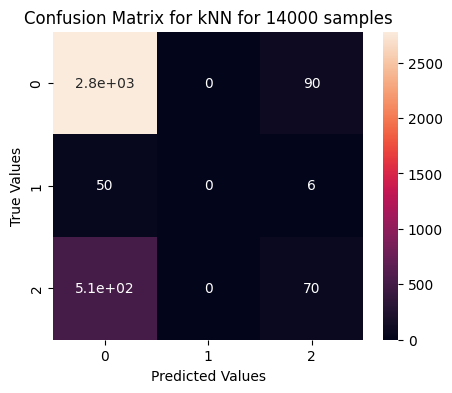

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_14k)
print("Accuracy original:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_14k)
print("Classification Report original:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for 14000 samples')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Accuracy oversampled: 56.85714285714286 %
Classification Report oversampled:
               precision    recall  f1-score   support

         0.0       0.90      0.58      0.71      2868
         1.0       0.02      0.21      0.04        56
         2.0       0.27      0.54      0.36       576

    accuracy                           0.57      3500
   macro avg       0.40      0.45      0.37      3500
weighted avg       0.79      0.57      0.64      3500

Confusion Matrix oversampled :
 [[1667  382  819]
 [  23   12   21]
 [ 153  112  311]]


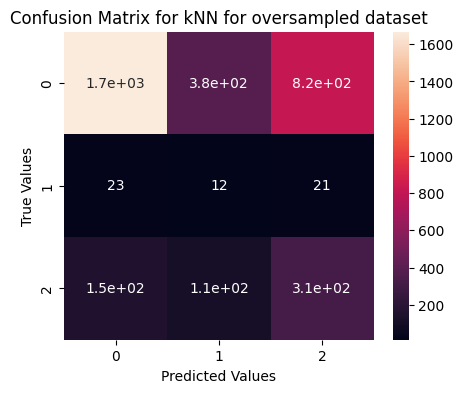

Confusion Matrix original :
 [[2778    0   90]
 [  50    0    6]
 [ 506    0   70]]


In [ ]:
# Create confusion matrix# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_oversampled_14k)
print("Accuracy oversampled:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_oversampled_14k)
print("Classification Report oversampled:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_oversampled_14k)
print("Confusion Matrix oversampled :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for oversampled dataset')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

In [ ]:
# predictions and accuracy score from KNN Model

# set model
knnModel = KNearestNeighborModel(9)

# fit training data
knnModel.fitTheTrain(X_train_14k, y_train_14k)

# predict for X test
y_pred_14k = knnModel.predictTheTest(X_test_14k)

# fit training data
knnModel.fitTheTrain(X_train_oversampled_14k, y_train_oversampled_14k)

# predict for X test
y_pred_oversampled_14k = knnModel.predictTheTest(X_test_14k)

# calculate accuracy score
acc= accuracy_score(y_test_14k, y_pred_oversampled_14k)

print("Accuracy Score:", acc)

Accuracy Score: 0.5585714285714286


Accuracy original: 81.74285714285713 %
Classification Report original:
               precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      2868
         1.0       0.00      0.00      0.00        56
         2.0       0.46      0.13      0.20       576

    accuracy                           0.82      3500
   macro avg       0.43      0.37      0.37      3500
weighted avg       0.76      0.82      0.77      3500

Confusion Matrix original :
 [[2788    0   80]
 [  52    0    4]
 [ 503    0   73]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


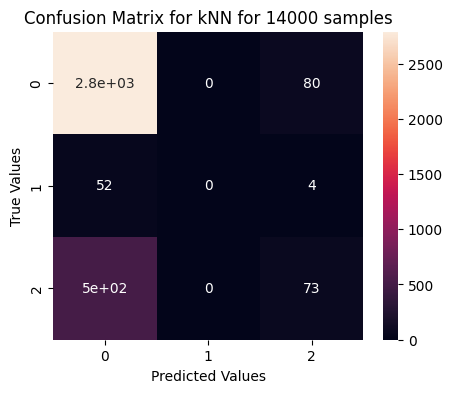

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_14k)
print("Accuracy original:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_14k)
print("Classification Report original:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for 14000 samples')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Accuracy oversampled: 55.85714285714286 %
Classification Report oversampled:
               precision    recall  f1-score   support

         0.0       0.91      0.57      0.70      2868
         1.0       0.02      0.21      0.04        56
         2.0       0.26      0.53      0.35       576

    accuracy                           0.56      3500
   macro avg       0.40      0.44      0.36      3500
weighted avg       0.79      0.56      0.63      3500

Confusion Matrix oversampled :
 [[1637  397  834]
 [  23   12   21]
 [ 144  126  306]]


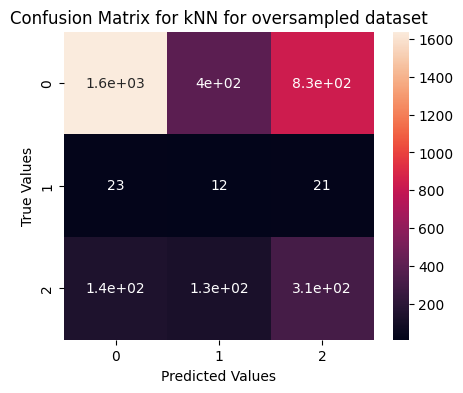

Confusion Matrix original :
 [[2788    0   80]
 [  52    0    4]
 [ 503    0   73]]


In [ ]:
# Create confusion matrix# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_oversampled_14k)
print("Accuracy oversampled:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_oversampled_14k)
print("Classification Report oversampled:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_oversampled_14k)
print("Confusion Matrix oversampled :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for oversampled dataset')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

In [ ]:
# predictions and accuracy score from KNN Model

# set model
knnModel = KNearestNeighborModel(11)

# fit training data
knnModel.fitTheTrain(X_train_14k, y_train_14k)

# predict for X test
y_pred_14k = knnModel.predictTheTest(X_test_14k)

# fit training data
knnModel.fitTheTrain(X_train_oversampled_14k, y_train_oversampled_14k)

# predict for X test
y_pred_oversampled_14k = knnModel.predictTheTest(X_test_14k)

# calculate accuracy score
acc= accuracy_score(y_test_14k, y_pred_oversampled_14k)

print("Accuracy Score:", acc)

Accuracy Score: 0.5502857142857143


Accuracy original: 81.97142857142858 %
Classification Report original:
               precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      2868
         1.0       0.00      0.00      0.00        56
         2.0       0.49      0.12      0.19       576

    accuracy                           0.82      3500
   macro avg       0.44      0.37      0.36      3500
weighted avg       0.76      0.82      0.77      3500

Confusion Matrix original :
 [[2800    0   68]
 [  53    0    3]
 [ 507    0   69]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


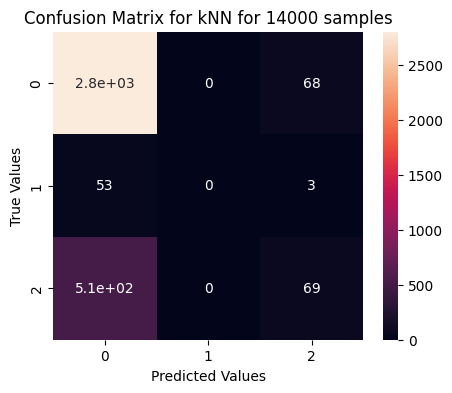

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_14k)
print("Accuracy original:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_14k)
print("Classification Report original:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for 14000 samples')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Accuracy oversampled: 55.028571428571425 %
Classification Report oversampled:
               precision    recall  f1-score   support

         0.0       0.91      0.56      0.69      2868
         1.0       0.02      0.25      0.04        56
         2.0       0.27      0.55      0.36       576

    accuracy                           0.55      3500
   macro avg       0.40      0.45      0.37      3500
weighted avg       0.79      0.55      0.63      3500

Confusion Matrix oversampled :
 [[1593  434  841]
 [  22   14   20]
 [ 126  131  319]]


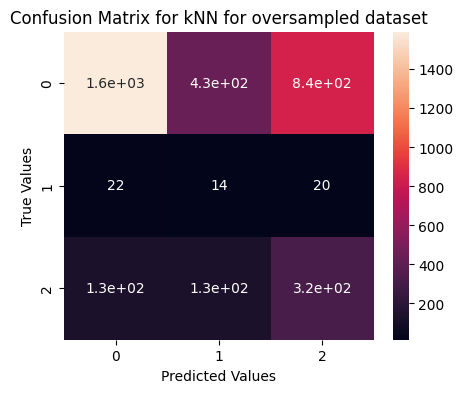

Confusion Matrix original :
 [[2800    0   68]
 [  53    0    3]
 [ 507    0   69]]


In [ ]:
# Create confusion matrix# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_oversampled_14k)
print("Accuracy oversampled:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_oversampled_14k)
print("Classification Report oversampled:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_oversampled_14k)
print("Confusion Matrix oversampled :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for oversampled dataset')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

In [ ]:
# predictions and accuracy score from KNN Model

# set model
knnModel = KNearestNeighborModel(13)

# fit training data
knnModel.fitTheTrain(X_train_14k, y_train_14k)

# predict for X test
y_pred_14k = knnModel.predictTheTest(X_test_14k)

# fit training data
knnModel.fitTheTrain(X_train_oversampled_14k, y_train_oversampled_14k)

# predict for X test
y_pred_oversampled_14k = knnModel.predictTheTest(X_test_14k)

# calculate accuracy score
acc= accuracy_score(y_test_14k, y_pred_oversampled_14k)

print("Accuracy Score:", acc)

Accuracy Score: 0.5445714285714286


Accuracy original: 81.74285714285713 %
Classification Report original:
               precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      2868
         1.0       0.00      0.00      0.00        56
         2.0       0.46      0.11      0.18       576

    accuracy                           0.82      3500
   macro avg       0.43      0.36      0.36      3500
weighted avg       0.76      0.82      0.77      3500

Confusion Matrix original :
 [[2797    0   71]
 [  53    0    3]
 [ 512    0   64]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


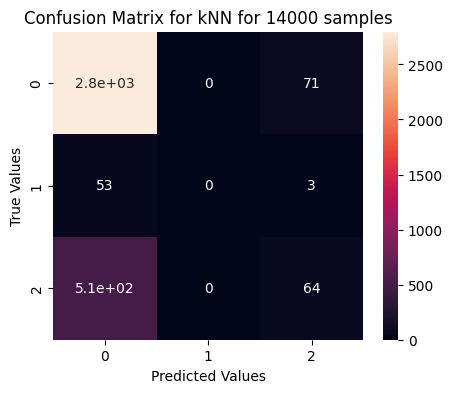

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_14k)
print("Accuracy original:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_14k)
print("Classification Report original:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for 14000 samples')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Accuracy oversampled: 54.45714285714286 %
Classification Report oversampled:
               precision    recall  f1-score   support

         0.0       0.91      0.55      0.69      2868
         1.0       0.02      0.25      0.04        56
         2.0       0.27      0.55      0.36       576

    accuracy                           0.54      3500
   macro avg       0.40      0.45      0.36      3500
weighted avg       0.79      0.54      0.62      3500

Confusion Matrix oversampled :
 [[1576  450  842]
 [  24   14   18]
 [ 124  136  316]]


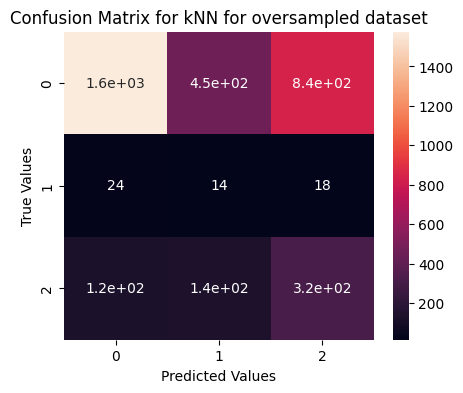

Confusion Matrix original :
 [[2797    0   71]
 [  53    0    3]
 [ 512    0   64]]


In [ ]:
# Create confusion matrix# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_oversampled_14k)
print("Accuracy oversampled:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_oversampled_14k)
print("Classification Report oversampled:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_oversampled_14k)
print("Confusion Matrix oversampled :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for oversampled dataset')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

In [ ]:
# predictions and accuracy score from KNN Model

# set model
knnModel = KNearestNeighborModel(15)

# fit training data
knnModel.fitTheTrain(X_train_14k, y_train_14k)

# predict for X test
y_pred_14k = knnModel.predictTheTest(X_test_14k)

# fit training data
knnModel.fitTheTrain(X_train_oversampled_14k, y_train_oversampled_14k)

# predict for X test
y_pred_oversampled_14k = knnModel.predictTheTest(X_test_14k)

# calculate accuracy score
acc= accuracy_score(y_test_14k, y_pred_oversampled_14k)

print("Accuracy Score:", acc)

Accuracy Score: 0.5442857142857143


Accuracy original: 81.88571428571429 %
Classification Report original:
               precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      2868
         1.0       0.00      0.00      0.00        56
         2.0       0.47      0.09      0.16       576

    accuracy                           0.82      3500
   macro avg       0.43      0.36      0.35      3500
weighted avg       0.76      0.82      0.76      3500

Confusion Matrix original :
 [[2812    0   56]
 [  52    0    4]
 [ 522    0   54]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


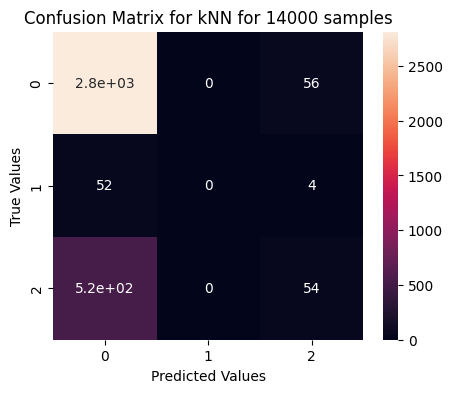

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_14k)
print("Accuracy original:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_14k)
print("Classification Report original:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for 14000 samples')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Accuracy oversampled: 54.42857142857142 %
Classification Report oversampled:
               precision    recall  f1-score   support

         0.0       0.92      0.55      0.69      2868
         1.0       0.02      0.25      0.04        56
         2.0       0.28      0.56      0.37       576

    accuracy                           0.54      3500
   macro avg       0.41      0.45      0.37      3500
weighted avg       0.80      0.54      0.62      3500

Confusion Matrix oversampled :
 [[1570  471  827]
 [  24   14   18]
 [ 112  143  321]]


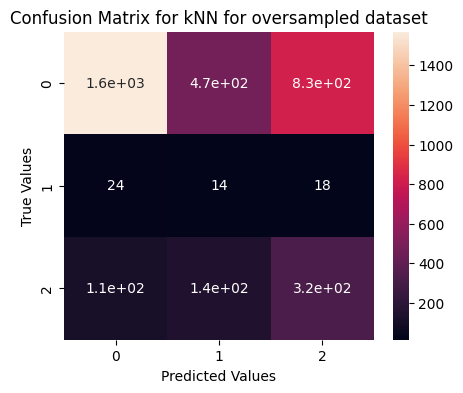

Confusion Matrix original :
 [[2812    0   56]
 [  52    0    4]
 [ 522    0   54]]


In [ ]:
# Create confusion matrix# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_oversampled_14k)
print("Accuracy oversampled:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_oversampled_14k)
print("Classification Report oversampled:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_oversampled_14k)
print("Confusion Matrix oversampled :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for oversampled dataset')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

In [ ]:
# predictions and accuracy score from KNN Model

# set model
knnModel = KNearestNeighborModel(17)

# fit training data
knnModel.fitTheTrain(X_train_14k, y_train_14k)

# predict for X test
y_pred_14k = knnModel.predictTheTest(X_test_14k)

# fit training data
knnModel.fitTheTrain(X_train_oversampled_14k, y_train_oversampled_14k)

# predict for X test
y_pred_oversampled_14k = knnModel.predictTheTest(X_test_14k)

# calculate accuracy score
acc= accuracy_score(y_test_14k, y_pred_oversampled_14k)

print("Accuracy Score:", acc)

Accuracy Score: 0.5377142857142857


Accuracy original: 81.94285714285714 %
Classification Report original:
               precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      2868
         1.0       0.00      0.00      0.00        56
         2.0       0.48      0.10      0.16       576

    accuracy                           0.82      3500
   macro avg       0.44      0.36      0.35      3500
weighted avg       0.76      0.82      0.76      3500

Confusion Matrix original :
 [[2811    0   57]
 [  52    0    4]
 [ 519    0   57]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


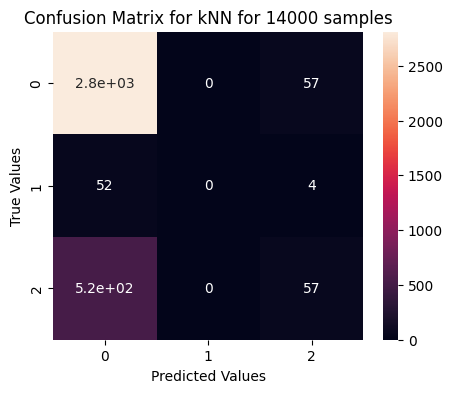

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_14k)
print("Accuracy original:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_14k)
print("Classification Report original:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for 14000 samples')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Accuracy oversampled: 53.77142857142857 %
Classification Report oversampled:
               precision    recall  f1-score   support

         0.0       0.92      0.54      0.68      2868
         1.0       0.02      0.25      0.04        56
         2.0       0.27      0.54      0.36       576

    accuracy                           0.54      3500
   macro avg       0.40      0.44      0.36      3500
weighted avg       0.80      0.54      0.62      3500

Confusion Matrix oversampled :
 [[1556  496  816]
 [  23   14   19]
 [ 115  149  312]]


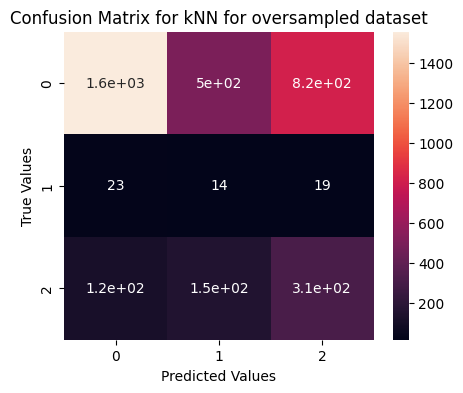

Confusion Matrix original :
 [[2811    0   57]
 [  52    0    4]
 [ 519    0   57]]


In [ ]:
# Create confusion matrix# Calculate accuracy
accuracy = accuracy_score(y_test_14k, y_pred_oversampled_14k)
print("Accuracy oversampled:", accuracy*100, "%")

# Create classification report
report = classification_report(y_test_14k, y_pred_oversampled_14k)
print("Classification Report oversampled:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test_14k, y_pred_oversampled_14k)
print("Confusion Matrix oversampled :\n", cm)

#Plotting the confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for kNN for oversampled dataset')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
cm = confusion_matrix(y_test_14k, y_pred_14k)
print("Confusion Matrix original :\n", cm)